# ARS MODEL CREATION

## 1. Importing the  data

In [1]:
from mnist import MNIST

In [2]:
import numpy as np
data=MNIST(path='data/',return_type='numpy')
data.select_emnist('letters')
X,y=data.load_training()

In [3]:
print(X.shape) #it means it has image of 28 x 28 pixel each 
print(y.shape)

(124800, 784)
(124800,)


In [4]:
print(np.unique(y))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26]


In [5]:
X=X.reshape(len(X),28,28)
X.shape

(124800, 28, 28)

In [6]:
y=y.reshape(len(y),1)
y=y-1
print(y.shape)
print(np.unique(y))

(124800, 1)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


## 2. Splitting the Dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)
# here the data is splitted into training and testing set with 80 : 20 ratio and also seed is applied through random_state

In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(99840, 28, 28)
(99840, 1)
(24960, 28, 28)
(24960, 1)


## 3. One HOT Encode the label

In [9]:
#Now its time to do one hot encoding of the label in the training and the testing set
from keras.utils import np_utils
y_train=np_utils.to_categorical(y_train,num_classes=26)
y_test=np_utils.to_categorical(y_test,num_classes=26)

Using TensorFlow backend.


In [10]:
np.unique(y_train)

array([0., 1.], dtype=float32)

## 4. Model Creation









In [11]:


### 3. Define our model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten(input_shape = (28,28))) #input layer
model.add(Dense(512, activation='relu')) #first hidden layer
model.add(Dropout(0.2)) # preventing overfitting
model.add(Dense(512, activation = 'relu')) #second hidden layer
model.add(Dropout(0.2))
model.add(Dense(26, activation='softmax')) #final output layer



model.compile(loss= 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 26)                13338     
Total params: 677,914
Trainable params: 677,914
Non-trainable params: 0
________________________________________________

In [12]:

from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'my_best_model.h5', verbose=1, save_best_only = True)     # this will keep the record of the validation loss score by default and save the model with least val_loss
history=model.fit(X_train, y_train, batch_size = 128, epochs= 10, validation_split = 0.2,
          callbacks=[checkpointer], verbose=1, shuffle=True)
print("History is : ")
print(history.history)

Train on 79872 samples, validate on 19968 samples
Epoch 1/10
79872/79872 [==============================] - 7s 88us/step - loss: 5.0750 - accuracy: 0.4658 - val_loss: 1.4348 - val_accuracy: 0.6375

Epoch 00001: val_loss improved from inf to 1.43484, saving model to my_best_model.h5
Epoch 2/10
79872/79872 [==============================] - 7s 90us/step - loss: 1.6246 - accuracy: 0.5974 - val_loss: 1.0793 - val_accuracy: 0.7112

Epoch 00002: val_loss improved from 1.43484 to 1.07935, saving model to my_best_model.h5
Epoch 3/10
79872/79872 [==============================] - 9s 111us/step - loss: 1.2155 - accuracy: 0.6770 - val_loss: 0.8364 - val_accuracy: 0.7565

Epoch 00003: val_loss improved from 1.07935 to 0.83644, saving model to my_best_model.h5
Epoch 4/10
79872/79872 [==============================] - 13s 160us/step - loss: 0.9650 - accuracy: 0.7306 - val_loss: 0.6958 - val_accuracy: 0.7949

Epoch 00004: val_loss improved from 0.83644 to 0.69577, saving model to my_best_model.h5
Epo

### LOSS GRAPH

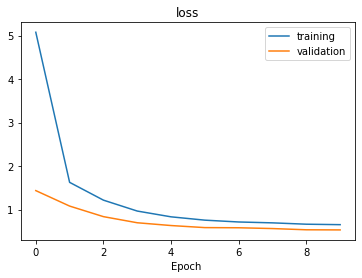

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('Epoch ')
plt.show()

### ACCURACY GRAPH

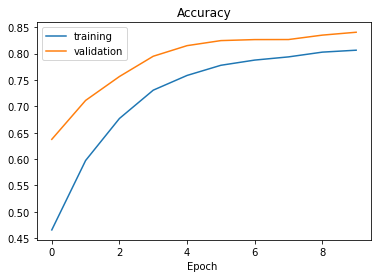

In [14]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('Epoch ')
plt.show()

## 5. Saving the Model created and evaulating the accuracy

In [15]:
# calculate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Test accuracy is ", accuracy)

Test accuracy is  84.23076868057251
